In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%config Completer.use_jedi = False

In [44]:
# read file

df = pd.read_csv('tottenham prem xg.csv')
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2020-09-13,16:30 (09:30),Matchweek 1,Sun,Home,L,0.0,1.0,Everton,1.0,1.4,51.0,NaN,Hugo Lloris,4-2-3-1,Martin Atkinson,Match Report,NaN
1,2020-09-20,12:00 (05:00),Matchweek 2,Sun,Away,W,5.0,2.0,Southampton,2.5,1.5,49.0,NaN,Hugo Lloris,4-3-2003,David Coote,Match Report,NaN
2,2020-09-27,14:00 (07:00),Matchweek 3,Sun,Home,D,1.0,1.0,Newcastle Utd,2.3,1.0,66.0,NaN,Hugo Lloris,4-2-3-1,Peter Bankes,Match Report,NaN
3,2020-10-04,16:30 (09:30),Matchweek 4,Sun,Away,W,6.0,1.0,Manchester Utd,3.8,0.9,62.0,NaN,Hugo Lloris,4-3-2003,Anthony Taylor,Match Report,NaN
4,2020-10-18,16:30 (09:30),Matchweek 5,Sun,Home,D,3.0,3.0,West Ham,1.2,2.1,51.0,NaN,Hugo Lloris,4-2-3-1,Paul Tierney,Match Report,NaN


This data frame contains totenham spurs data for season 20/21

In [45]:
# remove matchweek from round and turn into int

df['Round'] = df['Round'].str.split(expand = True)[1]
df.Round = df.Round.astype(int)

We found that the data frame is not sorted ascending, so we sort the df

In [51]:
# sort df ascending
df.sort_values(by=['Round'], inplace = True)

In [52]:
# create two new columns for the xG and xGA moving average

df['xG-SMA'] = df['xG'].rolling(window = 3).mean()
df['xGA-SMA'] = df['xGA'].rolling(window = 3).mean()

The two created coloumns calculate the average across 3 matches, we can change the window depending on the amount of data we are exploring, can be for 2, 5 or 20  

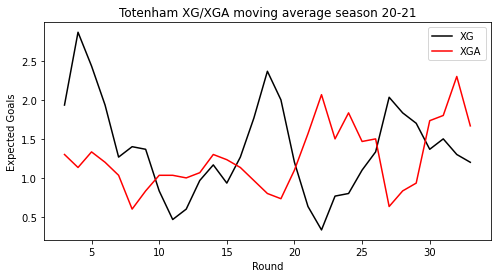

In [75]:
# now lets plot using matplotlib
plt.figure (figsize =(8,4), edgecolor= '#001C58')

plt.plot(df.Round, df['xG-SMA'], color = 'black', label = 'XG')
plt.plot(df.Round, df['xGA-SMA'], color = 'red', label = 'XGA')
plt.xlabel('Round')
plt.ylabel('Expected Goals')
plt.legend()
plt.title('Totenham XG/XGA moving average season 20-21', color = 'black', fontsize = 12)
plt.savefig('totenham_moving_average.png');

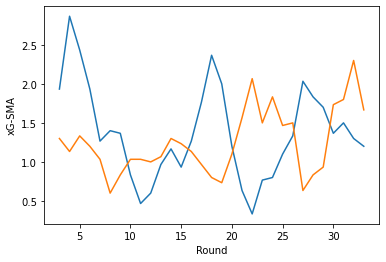

In [77]:
# plot usinf seaborn

sb.lineplot(x= df['Round'], y = df['xG-SMA'])
sb.lineplot(x= df['Round'], y = df['xGA-SMA']);